# Volume 4: Lorenz Equations
    Daniel Perkins
    MATH 437
    9/24/24

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.stats import linregress

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [21]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    # Initial values
    sigma = 10.
    p = 28.
    beta = 8/3.
    x, y, z = x
    # Derivatives
    x_prime = sigma*(y - x)
    y_prime = p*x - y - x*z
    z_prime = x*y - beta*z
    return np.array([x_prime, y_prime, z_prime])
     
    

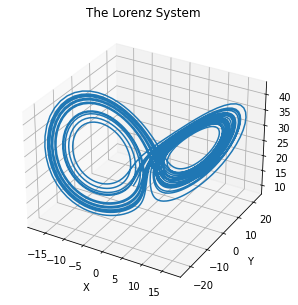

In [22]:
# Solve the ODE
t_span = (0, 25)
x0 = np.random.uniform(-15, 15, 3)  # Draw x,y,z from uniform distribution
sol = solve_ivp(lorenz, t_span, x0, max_step=0.01)

# Plot it
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2])
ax1.set_title("The Lorenz System")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

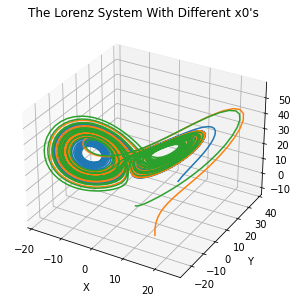

In [28]:
# Solve the ODE
t_span = (0, 25)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')

for i in range(3):
    x0 = np.random.uniform(-15, 15, 3)  # Draw x,y,z from uniform distribution
    sol = solve_ivp(lorenz, t_span, x0, max_step=0.01)
    ax1.plot(sol.y[0], sol.y[1], sol.y[2]) # Plot it

ax1.set_title("The Lorenz System With Different x0's")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-8)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4` and embed it into the notebook.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

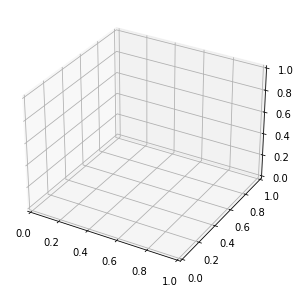

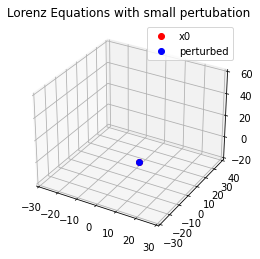

In [61]:
# Solve the ODE
t_span = (0, 50)
ts = np.linspace(0, 50, 3000)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')

x0 = np.random.uniform(-15, 15, 3)  # Draw x,y,z from uniform distribution
x1 = x0 + np.random.randn(3)*(1e-1)   # Random pertubations (I had larger one to make it visible)
sol0 = solve_ivp(lorenz, t_span, x0, t_eval=ts)
sol1 = solve_ivp(lorenz, t_span, x1, t_eval=ts)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 40)
ax.set_zlim3d(-20, 60)

# Create an empty line object
line, = ax.plot([], [], [], c="red")
dot, = ax.plot([], [], [], 'o', c="red", label="x0")  # Place dot at end
line2, = ax.plot([], [], [], c="blue")
dot2, = ax.plot([], [], [], 'o', c="blue", label="perturbed")  # Place dot at end

# Create a function to update line objects
def update(t):
    line.set_data_3d(sol0.y[0][:t], sol0.y[1][:t], sol0.y[2][:t])  # Line is everything up to the point
    dot.set_data_3d(sol0.y[0][t], sol0.y[1][t], sol0.y[2][t])
    line2.set_data_3d(sol1.y[0][:t], sol1.y[1][:t], sol1.y[2][:t])
    dot2.set_data_3d(sol1.y[0][t], sol1.y[1][t], sol1.y[2][t])
    return line, dot, line2, dot2

interval = 10  # Set interval 
ani = FuncAnimation(fig, update, frames=range(1400), interval=interval)  # Create animation object
ax.set_title("Lorenz Equations with small pertubation")
ax.legend(loc="upper right")
ani.save('lorenz_animation1.mp4')

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4` and embed it into the notebook.

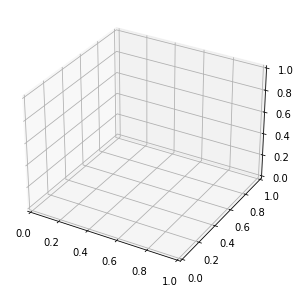

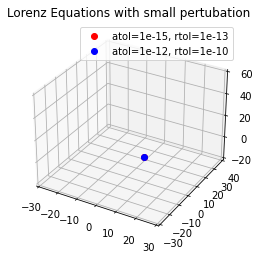

In [64]:
# Solve the ODE
t_span = (0, 50)
ts = np.linspace(0, 50, 3000)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111, projection='3d')

x0 = np.random.uniform(-15, 15, 3)  # Draw x, y, z from uniform distribution
sol0 = solve_ivp(lorenz, t_span, x0, max_step=0.01, atol=1e-15, rtol=1e-13)
sol1 = solve_ivp(lorenz, t_span, x0, max_step=0.01, atol=1e-12, rtol=1e-10)

# Create a figure and axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 40)
ax.set_zlim3d(-20, 60)

# Create an empty line object
line, = ax.plot([], [], [], c="red")
dot, = ax.plot([], [], [], 'o', c="red", label="atol=1e-15, rtol=1e-13")  # Place dot at end
line2, = ax.plot([], [], [], c="blue")
dot2, = ax.plot([], [], [], 'o', c="blue", label="atol=1e-12, rtol=1e-10")  # Place dot at end

# Create a function to update line objects
def update(t):
    line.set_data_3d(sol0.y[0][:t], sol0.y[1][:t], sol0.y[2][:t])  # Line is everything up to the point
    dot.set_data_3d(sol0.y[0][t], sol0.y[1][t], sol0.y[2][t])
    line2.set_data_3d(sol1.y[0][:t], sol1.y[1][:t], sol1.y[2][:t])
    dot2.set_data_3d(sol1.y[0][t], sol1.y[1][t], sol1.y[2][t])
    return line, dot, line2, dot2

interval = 10  # Set interval 
ani = FuncAnimation(fig, update, frames=range(1400), interval=interval)  # Create animation object
ax.set_title("Lorenz Equations with small pertubation")
ax.legend(loc="upper right")
ani.save('lorenz_animation2.mp4')

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your approximation of $\lambda$, and produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

0.8201406317342056


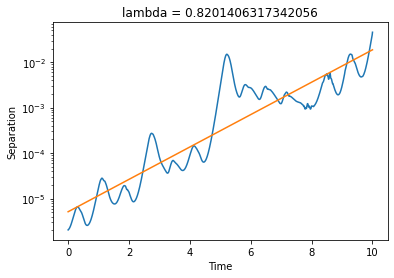

In [59]:
# Produce initial condition that already lies in the attractor
x0 = np.random.uniform(-15, 15, 3)  # Initial dummy condition
sol = solve_ivp(lorenz, t_span, x0, t_eval=ts, atol=1e-15, rtol=1e-13)
x0 = np.array([sol.y[0][-1], sol.y[1][-1], sol.y[2][-1]])

x1 = x0 + np.random.randn(3)*(1e-6)   # Random pertubations

# Solve the ODE
t_span = (0, 50)
ts = np.linspace(0, 10, 3000)
sol0 = solve_ivp(lorenz, t_span, x0, t_eval=ts)
sol1 = solve_ivp(lorenz, t_span, x1, t_eval=ts)

# Compute ||delta(t)||
def norm_delta(t):
    y0 = np.array([sol0.y[0][t], sol0.y[1][t], sol0.y[2][t]])
    y1 = np.array([sol1.y[0][t], sol1.y[1][t], sol1.y[2][t]])
    return np.linalg.norm(y0 - y1)
norm_deltas = []
for t in range(3000):
    norm_deltas.append(norm_delta(t))
    
# Calculate line of best fit for log(||delta(t)||)
slope, intercept, r, p, se = linregress(ts, np.log(norm_deltas))
print(slope)
    
# Plot on log plot
plt.title(f"lambda = {slope}")
plt.semilogy(ts, norm_deltas)
plt.semilogy(ts, np.exp(slope*ts + intercept))
plt.xlabel("Time")
plt.ylabel("Separation")
plt.show()
